In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [2]:
# Definitions

# Directorio de imagenes
dir_img = './../imagenes/P2_2'

# Data files
data_file = './../data/P3_2_2.txt'

In [3]:
# Creamos el directorio de imagenes
if not os.path.exists(dir_img):
	os.mkdir(dir_img)
else :
	os.system("rm -r " + dir_img)
	os.mkdir(dir_img)

In [4]:
# Get lines from data files
file = open(data_file, 'r')

# Read data in blocks of 5 lines
blocks = []

for i, line in enumerate(file):
	if i % 5 == 0:
		blocks.append([])
	blocks[-1].append(line)

# Close file
file.close()


In [5]:
# Review blocks to get the desired data
row_data = []

for block in blocks:

	splited_1 = block[0].split()
	splited_2 = block[1].split()
	splited_3 = block[2].split()
	splited_4 = block[3].split()
	splited_5 = block[4].split()

	elements = splited_1[4]
	blocks = splited_1[9]
	threads = splited_1[-2]
	repts = splited_2[4]
	time_host = splited_2[-2]
	time_dev = splited_3[-2]

	row_data.append({
		'elements': elements,
		'blocks': blocks,
		'threads': threads,
		'repts': repts,
		'time_host': time_host,	# MS
		'time_dev': time_dev	# MS
	})


In [6]:
# Convert row data to pandas DataFrame
df = pd.DataFrame(row_data)

# Convert columns to numeric
df['elements'] = pd.to_numeric(df['elements'])
df['blocks'] = pd.to_numeric(df['blocks'])
df['threads'] = pd.to_numeric(df['threads'])
df['repts'] = pd.to_numeric(df['repts'])
df['time_host'] = pd.to_numeric(df['time_host'])
df['time_dev'] = pd.to_numeric(df['time_dev'])

# Limit times to 2 decimal places
df['time_host'] = df['time_host'].round(3)
df['time_dev'] = df['time_dev'].round(3)

display(df)

# Latex code
# code = df.to_latex(index=False)
# print(code)

,elements,blocks,threads,repts,time_host,time_dev
0,3480000000,108750000,32,1,14773.328,10207.448
1,3480000000,54375000,64,1,14466.421,6622.943
2,3480000000,36250000,96,1,14982.508,9829.690
3,3480000000,27187500,128,1,14615.394,10038.033
4,3480000000,21750000,160,1,14651.510,10364.214
5,3480000000,18125000,192,1,14594.880,10118.989
6,3480000000,15535715,224,1,14606.531,10009.701
7,3480000000,13593750,256,1,14488.415,9917.299
8,3480000000,12083334,288,1,14566.970,9637.912
9,3480000000,10875000,320,1,14594.865,9913.020


In [7]:
# Remove atipical values using z-score

z_scores = np.abs(stats.zscore(df['time_host']))
threshold = 2

df = df[(z_scores < threshold)]

z_scores = np.abs(stats.zscore(df['time_dev']))
threshold = 2

df = df[(z_scores < threshold)]

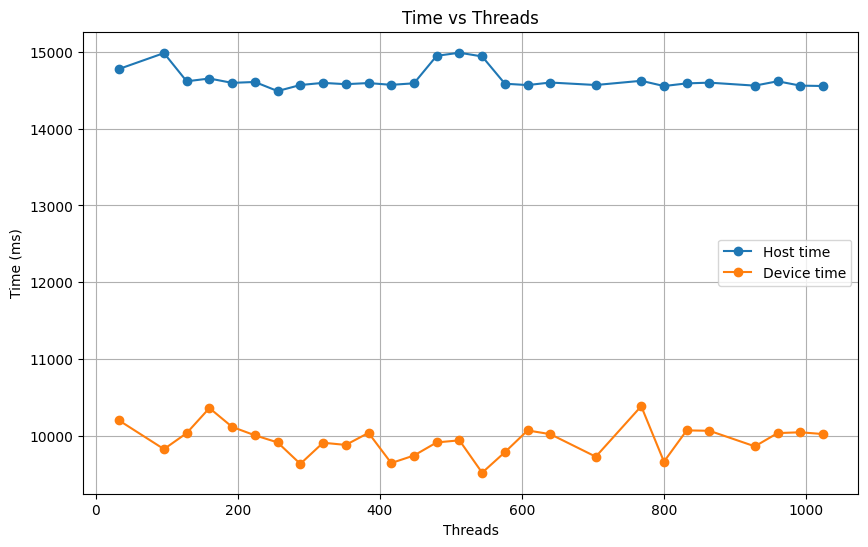

In [8]:
# Plot device time vs host time

plt.figure(figsize=(10, 6))

x_values = df['threads']
y_values_1 = df['time_host']
y_values_2 = df['time_dev']

plt.plot(x_values, y_values_1, label='Host time', marker='o')
plt.plot(x_values, y_values_2, label='Device time', marker='o')

plt.title('Time vs Threads')

plt.xlabel('Threads')
plt.ylabel('Time (ms)')

plt.grid()

plt.legend()

plt.savefig(dir_img + '/threads_vs_time.png')

plt.show()

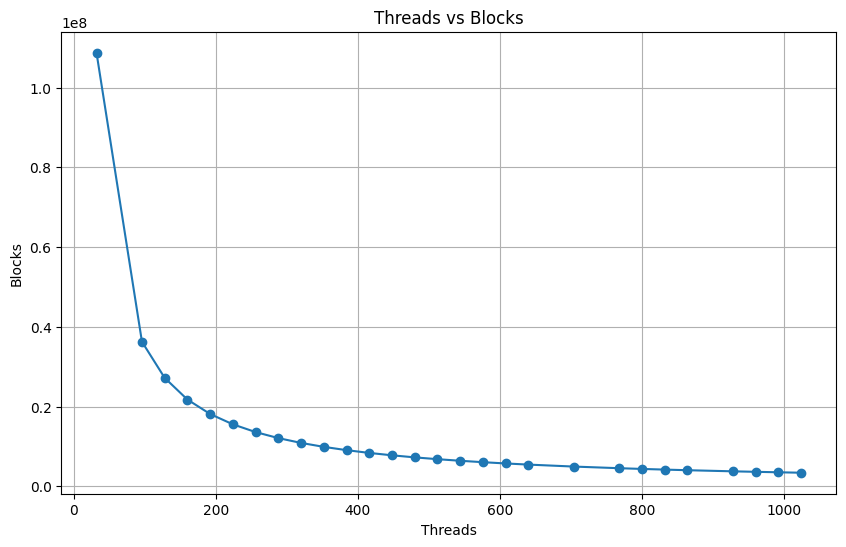

In [9]:
# Plot threads vs time

plt.figure(figsize=(10, 6))

x_values = df['threads']
y_values = df['blocks']

plt.plot(x_values, y_values, marker='o')

plt.title('Threads vs Blocks')

plt.xlabel('Threads')
plt.ylabel('Blocks')

plt.grid()

plt.savefig(dir_img + '/threads_vs_blocks.png')

plt.show()


In [10]:
# Get threads value with the minimum time in device
min_time_dev = df['time_dev'].min()

min_time_dev_threads = df[df['time_dev'] == min_time_dev]['threads'].values[0]

print('Threads with minimum time in device:', min_time_dev_threads)

Threads with minimum time in device: 544
